## **공공조달 데이터분석**

### **데이터 불러오기**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 데이터프레임 불러오기
data = pd.read_csv('/content/drive/MyDrive/Contest/공공조달/dataset/150_data_2.csv', index_col = 0)
data.head(10)

,녹색제품실적(건수),온실가스 배출량,용수사용량(ton),에너지사용량(TOE),폐기물발생량(ton),녹색제품 구매액(백만),에너지이용합리화법관련제품(건수),온실가스 감축률,여성임원수,장애인생산품구매비중,중소기업제품사용(건수),장애인채용현황(명),환경 유관부서 수,기부실적(백만원),총 직원수,여성직원수,감사임원수,여성직원비율,실적(백만명)
공공기관,,,,,,,,,,,,,,,,,,,
가축위생방역지원본부,19.0,2074.0,932.00,80.20,4.95,18.0,9.0,3.27,2.0,0.0,16.0,0.0,1.0,46.65,1275.0,436.43,1.0,0.34,10391.88
건강보험심사평가원,89.0,8987.0,65829.00,4107.57,186.40,3200.0,14.0,36.38,4.0,0.0,40.0,0.0,3.0,595.59,3971.0,2823.75,1.0,0.71,76878.46
건설근로자공제회,96.0,54.0,1226.25,64.85,13.88,70.0,38.0,15.63,4.0,0.0,46.0,0.0,2.0,21.18,218.5,83.50,1.0,0.38,1547.88
게임물관리위원회,11.0,11.0,NaN,NaN,NaN,62.0,8.0,56.00,3.0,11.0,9.0,0.0,NaN,1.77,99.0,30.00,1.0,0.30,4321.18
경제인문사회연구회,34.0,18.0,NaN,NaN,NaN,67.0,21.0,50.00,3.0,0.0,22.0,0.0,NaN,0.00,98.0,39.00,16.0,0.40,3825.08
고용노동부,438.0,12397.0,26289.00,971.10,123.40,1625.0,259.0,10.34,5.0,2.0,209.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,196782.57
공무원연금공단,145.0,938.0,7513.00,322.26,29.51,375.0,69.0,30.52,2.0,0.0,75.0,1.0,5.0,37.27,683.0,323.56,1.0,0.47,65349.03
과학기술정책연구원,4.0,3.0,2054.00,195.21,2.51,0.0,NaN,76.92,2.0,0.0,NaN,0.0,1.0,0.00,167.0,79.00,1.0,0.47,992.77
관세청,690.0,9825.0,5285.22,257.36,26.74,3219.0,86.0,19.43,0.0,0.0,509.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,92803.41


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 가축위생방역지원본부 to 환경부
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   녹색제품실적(건수)         146 non-null    float64
 1   온실가스 배출량           136 non-null    float64
 2   용수사용량(ton)         139 non-null    float64
 3   에너지사용량(TOE)        139 non-null    float64
 4   폐기물발생량(ton)        139 non-null    float64
 5   녹색제품 구매액(백만)       141 non-null    float64
 6   에너지이용합리화법관련제품(건수)  142 non-null    float64
 7   온실가스 감축률           136 non-null    float64
 8   여성임원수              149 non-null    float64
 9   장애인생산품구매비중         148 non-null    float64
 10  중소기업제품사용(건수)       139 non-null    float64
 11  장애인채용현황(명)         149 non-null    float64
 12  환경 유관부서 수          139 non-null    float64
 13  기부실적(백만원)          115 non-null    float64
 14  총 직원수              133 non-null    float64
 15  여성직원수              133 non-null    float64
 16  감사임원수              133

In [6]:
# 결측치 확인
data.isna().sum()

녹색제품실적(건수)            3
온실가스 배출량             13
용수사용량(ton)           10
에너지사용량(TOE)          10
폐기물발생량(ton)          10
녹색제품 구매액(백만)          8
에너지이용합리화법관련제품(건수)     7
온실가스 감축률             13
여성임원수                 0
장애인생산품구매비중            1
중소기업제품사용(건수)         10
장애인채용현황(명)            0
환경 유관부서 수            10
기부실적(백만원)            34
총 직원수                16
여성직원수                16
감사임원수                16
여성직원비율               16
실적(백만명)               7
dtype: int64

In [7]:
# 결측치 평균으로 채우기
data.fillna(data.mean(),inplace=True)

In [8]:
# 결측치 확인
data.isna().sum()

녹색제품실적(건수)           0
온실가스 배출량             0
용수사용량(ton)           0
에너지사용량(TOE)          0
폐기물발생량(ton)          0
녹색제품 구매액(백만)         0
에너지이용합리화법관련제품(건수)    0
온실가스 감축률             0
여성임원수                0
장애인생산품구매비중           0
중소기업제품사용(건수)         0
장애인채용현황(명)           0
환경 유관부서 수            0
기부실적(백만원)            0
총 직원수                0
여성직원수                0
감사임원수                0
여성직원비율               0
실적(백만명)              0
dtype: int64

In [9]:
# 컬럼명 변경
data.columns = ['Green_CNT','Gas','Water','Energy','Waste','Green_AMT','Energy_pr','Gas_reduce','Female_exe',
                'Disabled_pr','Small_CNT','Disabled_CNT','Env','Donation','Member','Female_member','Auditor','Female_RTO','Target' ]

### **EDA 및 전처리**

In [10]:
data.describe()

,Green_CNT,Gas,Water,Energy,Waste,Green_AMT,Energy_pr,Gas_reduce,Female_exe,Disabled_pr,Small_CNT,Disabled_CNT,Env,Donation,Member,Female_member,Auditor,Female_RTO,Target
count,149.000000,149.000000,1.490000e+02,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,633.883562,7205.485294,4.008982e+04,9.398830e+03,7460.359281,5933.691489,308.366197,29.127721,2.281879,1.128378,393.230216,2.207248,2.431655,1165.343478,1795.863233,585.220000,1.007519,0.355414,3.600693e+05
std,2132.140368,15586.577656,1.188734e+05,9.044811e+04,75828.102114,24345.966014,1332.775607,18.917737,1.568613,3.020830,1176.565968,5.696164,1.979798,3119.258954,3021.838507,1159.380592,1.322856,0.138610,1.076388e+06
min,0.000000,0.000000,0.000000e+00,7.790000e+00,0.000000,0.000000,0.000000,-32.290000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,42.000000,12.000000,0.000000,0.030000,1.321500e+02
25%,34.000000,356.000000,4.217000e+03,2.073200e+02,13.880000,115.000000,21.000000,17.280000,1.000000,0.000000,31.000000,0.000000,1.000000,9.820000,218.500000,83.500000,1.000000,0.280000,6.914310e+03
50%,135.000000,2669.000000,1.432100e+04,8.044600e+02,36.600000,776.000000,68.000000,29.127721,2.000000,0.000000,103.000000,0.000000,2.000000,69.380000,755.000000,235.600000,1.000000,0.355414,3.711054e+04
75%,601.000000,7205.485294,4.008982e+04,2.004690e+03,186.400000,3476.000000,285.000000,37.020000,3.000000,1.000000,393.230216,2.000000,3.000000,1165.343478,1795.863233,585.220000,1.000000,0.420000,1.859052e+05
max,23225.000000,153925.000000,1.068774e+06,1.105342e+06,924833.000000,266694.000000,15508.000000,100.000000,7.000000,25.000000,13496.000000,42.000000,15.000000,20136.230000,23540.000000,9130.000000,16.000000,0.720000,6.864351e+06


column name: Green_CNT
column name: Gas
column name: Water
column name: Energy
column name: Waste
column name: Green_AMT
column name: Energy_pr
column name: Gas_reduce
column name: Female_exe
column name: Disabled_pr
column name: Small_CNT
column name: Disabled_CNT
column name: Env
column name: Donation
column name: Member
column name: Female_member
column name: Auditor
column name: Female_RTO


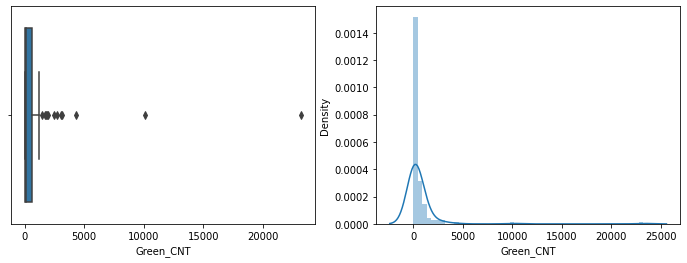

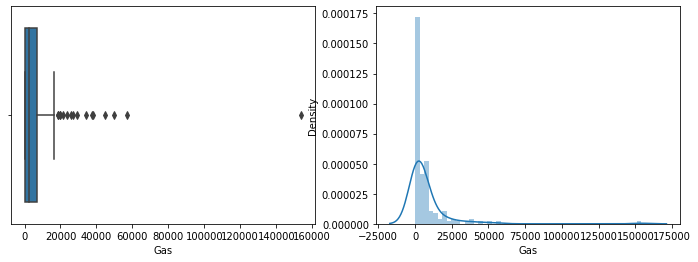

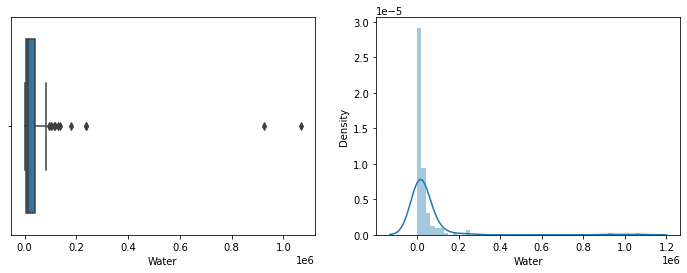

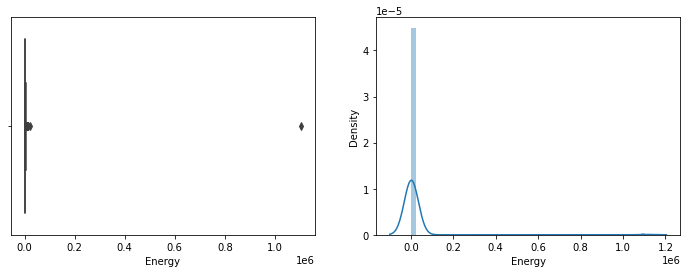

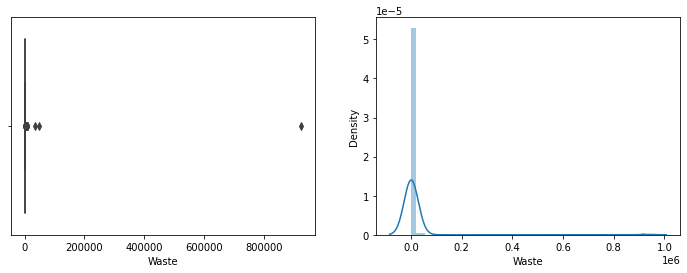

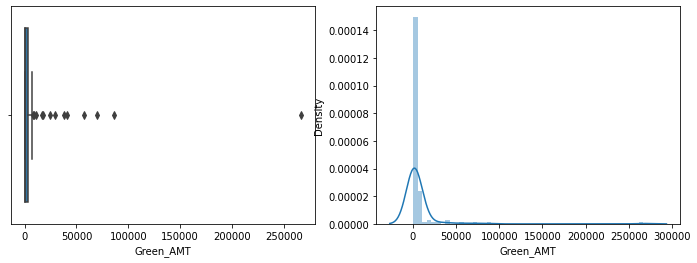

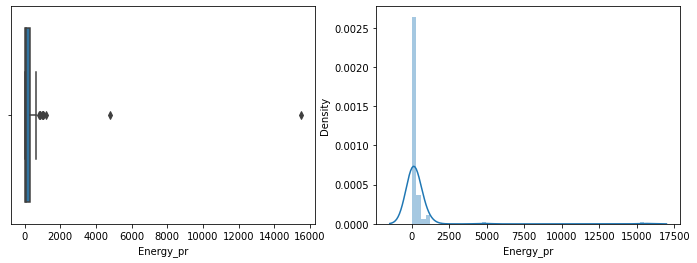

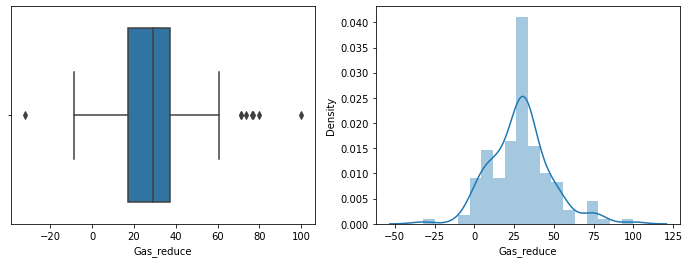

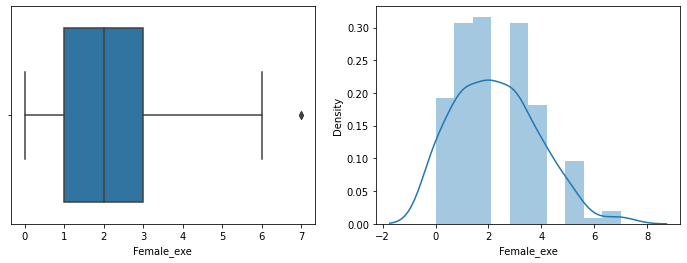

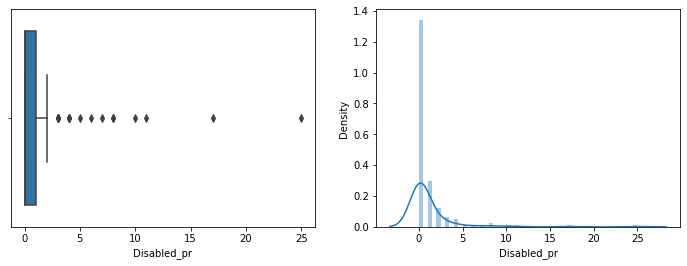

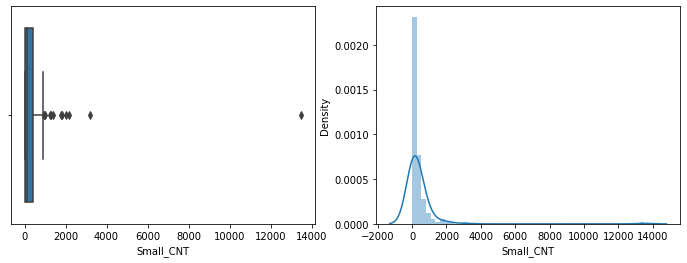

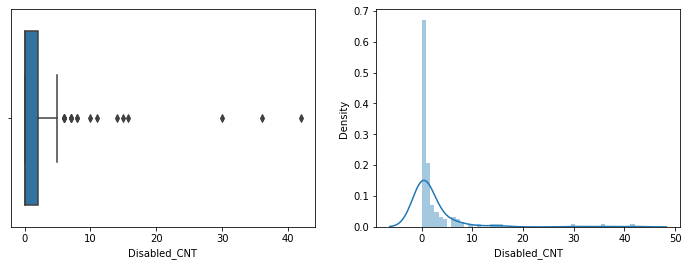

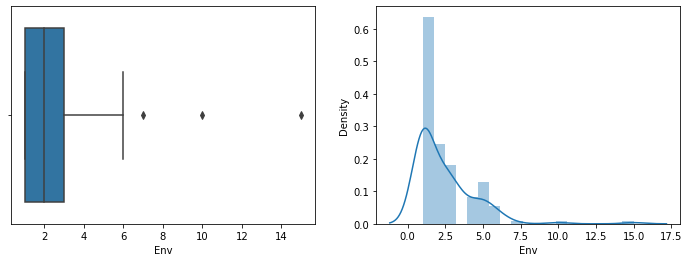

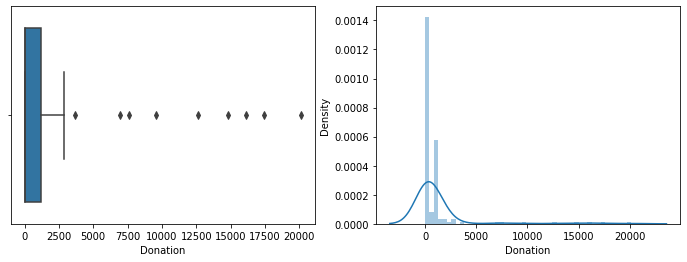

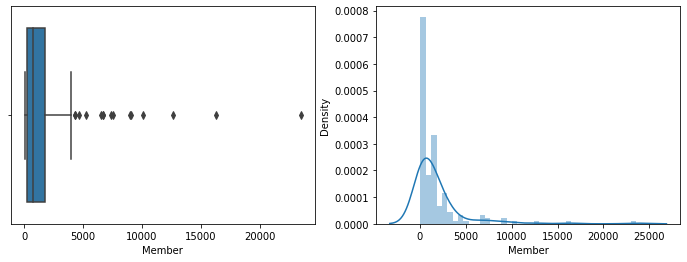

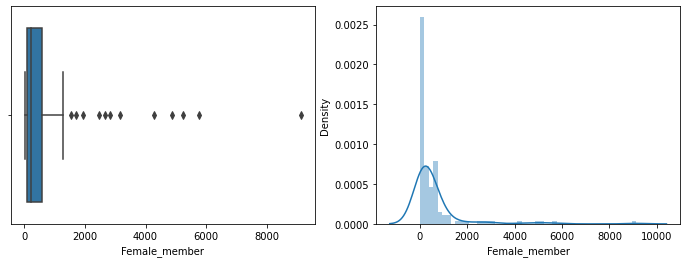

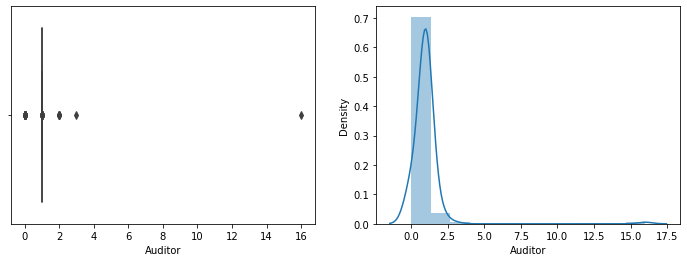

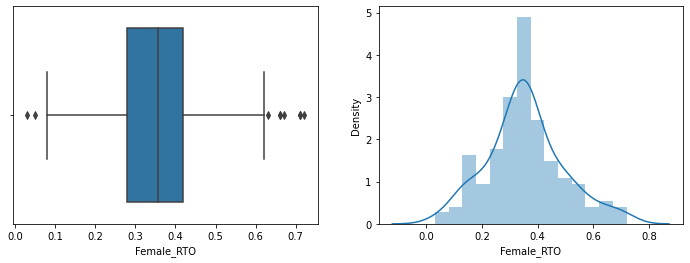

In [26]:
# 시각화
def show_hist(df, columns):

    for column in columns:
        print('column name:', column)
        fig, axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2 ,squeeze=False)
        sns.boxplot(df[column], ax=axs[0][0])
        sns.distplot(df[column], ax=axs[0][1])

columns = ['Green_CNT','Gas','Water','Energy','Waste','Green_AMT','Energy_pr','Gas_reduce','Female_exe',
                'Disabled_pr','Small_CNT','Disabled_CNT','Env','Donation','Member','Female_member','Auditor','Female_RTO']
show_hist(data,columns)

In [30]:
# # EDA에서 확인한 이상치 치환
# def cut_outlier(df, columns):
#     df=df.copy()
#     for column in columns:
#         q1=df[column].quantile(.25)
#         q3=df[column].quantile(.75)
#         iqr=q3-q1
#         low=q1-1.5*iqr
#         high=q3+1.5*iqr
#         df.loc[df[column]<low, column]=low
#         df.loc[df[column]>high, column]=high
#     return df

# data = cut_outlier(data, ['Waste', 'Energy'])

### **상관관계 확인**

In [33]:
# 상관관계 분석(전체 데이터)
corr_data = data.corr()
corr_data

,Green_CNT,Gas,Water,Energy,Waste,Green_AMT,Energy_pr,Gas_reduce,Female_exe,Disabled_pr,Small_CNT,Disabled_CNT,Env,Donation,Member,Female_member,Auditor,Female_RTO,Target
Green_CNT,1.000000,0.077570,0.025012,0.024753,0.003249,0.432004,0.977495,-0.047314,0.018537,-0.045018,0.913260,0.092498,-0.004935,0.048329,0.141704,0.099601,-0.024978,-0.018619,0.387258
Gas,0.077570,1.000000,0.107678,0.065886,0.006819,0.042439,0.062267,-0.127104,0.044844,-0.070420,0.090818,0.023458,0.107207,0.039170,0.118503,0.155966,0.018412,0.017765,0.084634
Water,0.025012,0.107678,1.000000,0.459318,0.378161,0.062473,0.011510,0.007633,-0.130935,-0.060067,-0.019241,0.080920,0.067232,0.017662,0.068389,0.027315,-0.008402,-0.127894,0.112766
Energy,0.024753,0.065886,0.459318,1.000000,0.716766,0.143555,-0.009284,-0.039190,-0.088639,-0.049343,-0.024527,0.140401,0.127066,0.101502,0.232070,0.180433,0.143699,-0.121318,0.193741
Waste,0.003249,0.006819,0.378161,0.716766,1.000000,0.088172,-0.023071,0.025530,-0.059478,-0.052025,-0.024612,0.126816,0.164430,0.089952,0.104362,0.000291,0.089557,-0.152427,0.130160
Green_AMT,0.432004,0.042439,0.062473,0.143555,0.088172,1.000000,0.349177,-0.012539,0.027341,-0.065391,0.389256,0.084489,0.202645,0.401433,0.298171,0.237330,-0.083603,-0.047586,0.751474
Energy_pr,0.977495,0.062267,0.011510,-0.009284,-0.023071,0.349177,1.000000,-0.041436,0.033077,-0.029952,0.919255,-0.000003,-0.038390,0.022908,0.042722,0.031628,-0.007403,0.007886,0.281290
Gas_reduce,-0.047314,-0.127104,0.007633,-0.039190,0.025530,-0.012539,-0.041436,1.000000,0.139530,0.162499,-0.046835,0.033789,0.027474,0.033719,-0.034804,-0.019319,0.056898,0.163066,-0.017306
Female_exe,0.018537,0.044844,-0.130935,-0.088639,-0.059478,0.027341,0.033077,0.139530,1.000000,0.075198,0.065252,0.026978,0.092679,0.012431,-0.062761,-0.035828,0.070730,0.232440,0.006810
Disabled_pr,-0.045018,-0.070420,-0.060067,-0.049343,-0.052025,-0.065391,-0.029952,0.162499,0.075198,1.000000,-0.053287,-0.075433,-0.074676,0.024750,-0.064734,-0.027334,-0.071322,0.102578,-0.086820


<function matplotlib.pyplot.show>

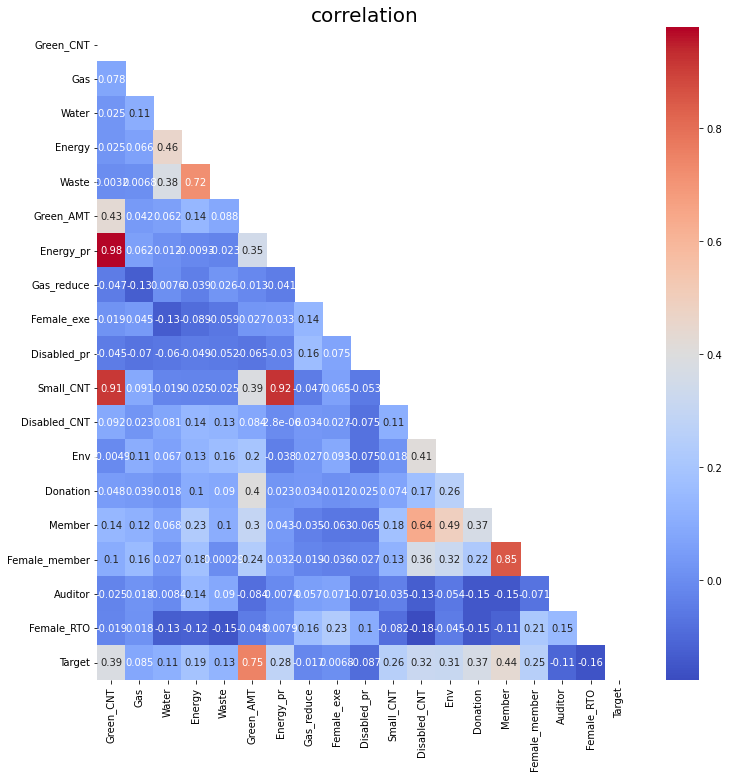

In [34]:
# 시각화
mask = np.zeros_like(corr_data) # 숫자 표시
mask[np.triu_indices_from(mask)] = True # 상삼각만
plt.figure(figsize=(12,12))
sns.heatmap(corr_data, annot=True, mask=mask, cmap='coolwarm')
plt.title('correlation', fontsize=20)
plt.show

In [35]:
# 상관관계 분석(분류)
env_column = ['Green_CNT','Gas','Water','Energy','Waste','Green_AMT','Energy_pr','Gas_reduce', 'Target']
hm_column = ['Female_exe','Disabled_pr','Small_CNT','Disabled_CNT','Env','Donation','Member','Female_member','Auditor','Female_RTO', 'Target']

env_corr = data[env_column].corr()
hm_corr = data[hm_column].corr()

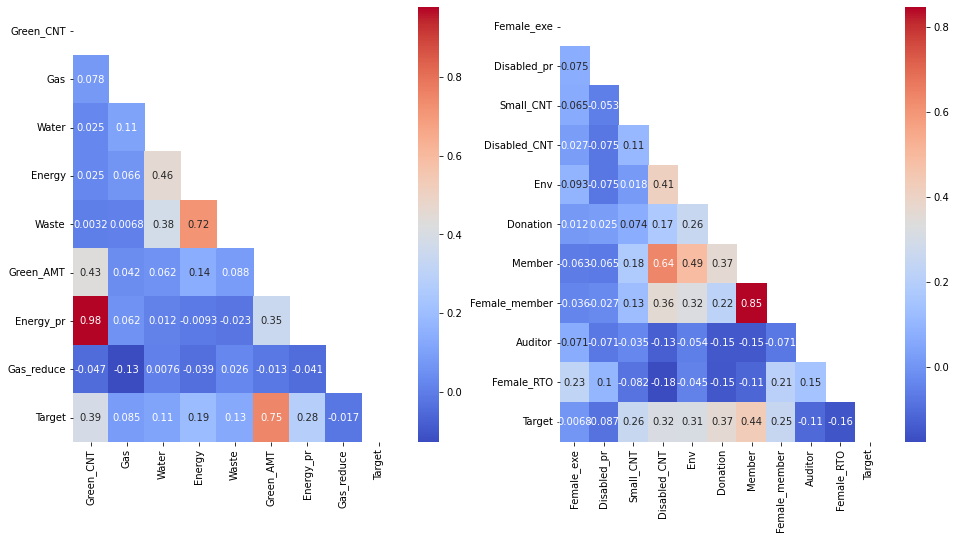

In [36]:
# 시각화
mask1 = np.zeros_like(env_corr)
mask2 = np.zeros_like(hm_corr)
mask1[np.triu_indices_from(mask1)] = True
mask2[np.triu_indices_from(mask2)] = True
fig, axs = plt.subplots(figsize=(16,8), nrows=1,ncols=2, squeeze=False)
sns.heatmap(env_corr, annot=True,mask=mask1, cmap='coolwarm', ax=axs[0][0])
sns.heatmap(hm_corr, annot=True, mask=mask2, cmap='coolwarm', ax=axs[0][1])
